In [12]:
distribution_name = 'GPareto'

In [13]:
import pyreadr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Figure 1
Medians (points) and interquartile ranges (vertical bars) of relative errors, $\eta$, of extrapolated extreme quantiles for different sample lengths. Results are grouped according to the return period.

In [16]:
# Import data set with 25th, 50th, and 75th percentile of errors for a sample length and a return period
quartiles_error = pyreadr.read_r("QuartilesErrors_%s.rds" %distribution_name)
quartiles_error = quartiles_error[None]
quartiles_error = pd.DataFrame(quartiles_error)
min(quartiles_error['Median_error'])

-25.154636624617257

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


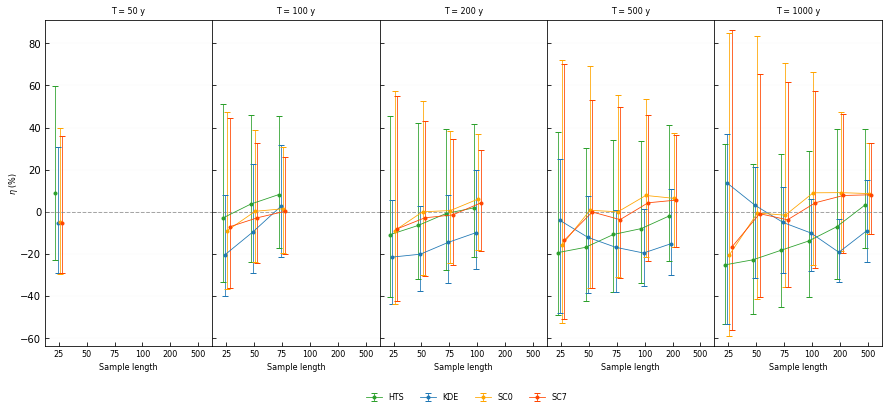

In [11]:
# Plot Figure 1
T_unique = list(set(quartiles_error['Return_period'].to_list()))
T_unique = np.floor(T_unique).astype(int)
T_unique.sort()
Meth_unique = list(set(quartiles_error['Method'].to_list()))
Meth_unique.sort()
L_unique = list(set(quartiles_error['Sample_length'].to_list()))
L_unique.sort()
L_unique = [str(round(x)) for x in L_unique]
x = np.arange(1,len(set(quartiles_error['Sample_length'].to_list())) + 1)
dx = np.array([-0.12, -0.04, 0.04, 0.12])
font = {'family': 'sans serif',
        'color':  'black',
        'fontname': 'Arial',
        'weight': 'normal',
        'size': 8,
        }
font_l = {'family':'Arial',
          'size':8}
cols = np.array(["tab:green","tab:blue","orange","orangered"])
leg_name = ['HTS', 'KDE','SC0','SC7']

fig = plt.figure(figsize = (15, 6), constrained_layout = False)
gs = fig.add_gridspec(ncols = 5, nrows = 1, hspace = 0.05, wspace = 0) 
for column, tt in enumerate(T_unique):
    t_ax = fig.add_subplot(gs[0, column])
    t_ax.set_xlim([0.5, 6.5]) 
    t_ax.set_xticks(x)
    t_ax.tick_params(axis = 'x', direction = "in",length = 4)
    t_ax.tick_params(axis = 'y', direction = "in",length = 4)
    t_ax.plot([0.5, 6.5], [0, 0], '--', color = 'grey', alpha = 0.7, linewidth = 1, label = '_nolegend_') 
    t_ax.set_xlabel('Sample length', fontdict = font)       
    t_ax.set_ylim([min(quartiles_error['Q1_error']) - 5, max(quartiles_error['Q3_error']) + 5])
    t_ax.set_title('T = %d y' %tt, fontdict=font)
    t_ax.set_xticklabels(L_unique, fontdict = font)
    if column == 0:
        t_ax.set_ylabel('$\eta$ (%)', fontdict = font, labelpad = 0.001)
    else:
        t_ax.set_yticklabels([],fontdict=font)
    for ind, mm in enumerate(Meth_unique):
        tmp_df = quartiles_error[(quartiles_error['Return_period'] == tt) & (quartiles_error['Method'] == mm)]
        sorted_df = tmp_df.sort_values(by = ['Sample_length'])
        med_err = sorted_df[['Sample_length', 'Median_error']]
        lower_err = med_err['Median_error'] - sorted_df['Q1_error'].to_list()
        upper_err = sorted_df['Q3_error'].to_list() - med_err['Median_error']
        asymmetric_err = [lower_err, upper_err]
        t_ax.errorbar(x + dx[ind], med_err['Median_error'], yerr = asymmetric_err, fmt = '-o',capsize = 3, alpha = 1,
                      label = leg_name[ind], color = cols[ind], markersize = 3, linewidth = 0.8)
        t_ax.grid(axis = 'y', color = 'gainsboro', linestyle = '-', linewidth = 0.1)
t_ax.legend(loc = (-2.1,-0.18), ncol = 4, prop = font_l, frameon = False)          
        
fig.savefig("Figure1_%s.pdf" %distribution_name, bbox_inches = "tight")    

# Figure 2

Box plots of median errors, $\eta$, of extreme quantiles extrapolated from samples with a length equal to 50. Box plots are grouped by extrapolation technique and distribution.

In [10]:
# Import data set with quantiles and relative errors for each sample length and return period
quantiles = pyreadr.read_r("EstimatedQuantiles_and_Errors_%s.rds" %distribution_name)
quantiles = quantiles[None]
quantiles = pd.DataFrame(quantiles)
errors = pd.DataFrame(quantiles[['Sample_length', 'Return_period', 'HTS_error', 'KDE_error', 'SC0_error', 'SC7_error']])
errors = errors.dropna()
errors

,Sample_length,Return_period,HTS_error,KDE_error,SC0_error,SC7_error
0,25.0,50.0,37.293700,-5.215614,-19.992977,-19.992977
1,25.0,100.0,43.506244,-24.955769,-10.982227,-10.982227
2,25.0,200.0,44.741541,-38.528758,0.439114,0.439114
3,25.0,500.0,42.100321,-47.864633,19.744462,19.744462
4,25.0,1000.0,38.224999,-39.988930,38.112165,38.112165
...,...,...,...,...,...,...
14979,500.0,1000.0,125.177845,55.546572,9.420891,9.420891
14984,500.0,1000.0,-14.943642,-22.869980,-0.339364,-0.339364
14989,500.0,1000.0,-34.446106,-36.450777,-31.010752,-31.010752
14994,500.0,1000.0,-2.002426,-14.050950,2.601174,2.601174


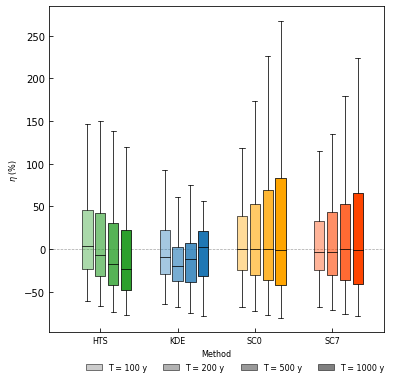

In [7]:
# Plot Figure 2
NN = 50
flierprops = dict(marker = 'o', markerfacecolor = 'grey', markersize = 1,
                  linestyle = 'none', markeredgecolor = 'grey')
medianprops = dict(linestyle = '-', linewidth = 0.5, color = 'black')
whiskerprops = dict(linestyle = '-', linewidth = 0.5, color = 'black')
capprops = dict(linestyle = '-', linewidth = 0.5)
l_w = 0.5 # box linewidth
transp = [0.2,0.4,0.6,0.8,1] # level of transparency
cols = np.array(["tab:green","tab:blue","orange","orangered"])
leg_name = ['T = 50 y ','T = 100 y','T = 200 y','T = 500 y','T = 1000 y']
meth_name = errors.columns[2:6]
pos = [0,6,12,18] 

fig = plt.figure(figsize = (6,6), constrained_layout = False)
t_ax = fig.add_subplot()
t_ax.set_xlabel('Method', fontdict = font)
t_ax.set_ylabel('$\eta$ (%)', fontdict = font)
t_ax.tick_params(axis = 'x', direction = "in",length = 4)
t_ax.tick_params(axis = 'y', direction = "in",length = 4)
ds = 1
for ind_t,tt in enumerate(T_unique):        
    tmp = errors[(errors['Sample_length'] == NN) & (errors['Return_period'] == tt)]
    for ind_m,mm in enumerate(meth_name): 
        t_ax.boxplot(tmp[mm], positions = [pos[ind_m] + ds], widths = 0.8, patch_artist = True,
                     boxprops = dict(linewidth = l_w, facecolor = cols[ind_m], alpha = transp[ind_t]),
                     whiskerprops = whiskerprops, showfliers = False, medianprops = medianprops, capprops = capprops)  
        t_ax.boxplot(tmp[mm], positions = [pos[ind_m] + ds], widths = 0.8, patch_artist = True,
                     boxprops = dict(linewidth = l_w,facecolor='none',alpha = 1), whiskerprops = whiskerprops,
                     showfliers = False, medianprops = medianprops, capprops = capprops)  
    ds=ds+1
    t_ax.set_xlim(-1, 25)
    t_ax.set_xticks([3, 9, 15, 21])
    t_ax.set_xticklabels(['HTS', 'KDE', 'SC0', 'SC7'], fontdict=font)  
bp2=t_ax.boxplot(tmp['SC0_error'], positions = [-100], widths = 0.8, patch_artist = True, boxprops = dict(linewidth = l_w, facecolor = (0.5,0.5,0.5,transp[1])),showfliers=False,medianprops=medianprops)  
bp3=t_ax.boxplot(tmp['SC0_error'], positions = [-100], widths = 0.8, patch_artist = True, boxprops = dict(linewidth = l_w, facecolor = (0.5,0.5,0.5,transp[2])),showfliers=False,medianprops=medianprops)  
bp4=t_ax.boxplot(tmp['SC0_error'], positions = [-100], widths = 0.8, patch_artist = True, boxprops = dict(linewidth = l_w, facecolor = (0.5,0.5,0.5,transp[3])),showfliers=False,medianprops=medianprops)  
bp5=t_ax.boxplot(tmp['SC0_error'], positions = [-100], widths = 0.8, patch_artist = True, boxprops = dict(linewidth = l_w, facecolor = (0.5,0.5,0.5,transp[4])),showfliers=False,medianprops=medianprops)  
t_ax.plot([-1,25],[0,0],'--',color='grey',alpha=0.7,linewidth=0.7,label='_nolegend_',zorder=0) 
t_ax.legend([bp2["boxes"][0],bp3["boxes"][0],bp4["boxes"][0],bp5["boxes"][0]], [leg_name[1],leg_name[2],leg_name[3],leg_name[4]], loc=(0.1,-0.13), ncol = 4, prop=font_l, frameon=False)

fig.savefig("Figure2_%s.pdf" %distribution_name,bbox_inches="tight") 

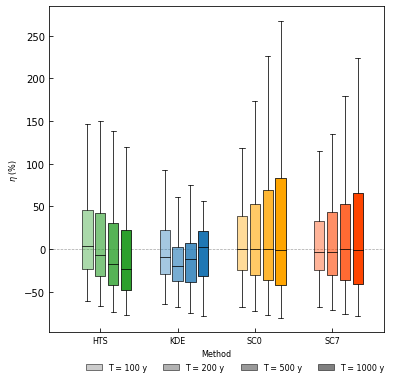

In [8]:
# Plot Figure 2
NN = 50
flierprops = dict(marker = 'o', markerfacecolor = 'grey', markersize = 1,
                  linestyle = 'none', markeredgecolor = 'grey')
medianprops = dict(linestyle = '-', linewidth = 0.5, color = 'black')
whiskerprops = dict(linestyle = '-', linewidth = 0.5, color = 'black')
capprops = dict(linestyle = '-', linewidth = 0.5)
l_w = 0.5 # box linewidth
transp = [0.2,0.4,0.6,0.8,1] # level of transparency
cols = np.array(["tab:green","tab:blue","orange","orangered"])
leg_name = ['T = 50 y ','T = 100 y','T = 200 y','T = 500 y','T = 1000 y']
meth_name = errors.columns[2:6]
pos = [0,6,12,18] 

fig = plt.figure(figsize = (6,6), constrained_layout = False)
t_ax = fig.add_subplot()
t_ax.set_xlabel('Method', fontdict = font)
t_ax.set_ylabel('$\eta$ (%)', fontdict = font)
t_ax.tick_params(axis = 'x', direction = "in",length = 4)
t_ax.tick_params(axis = 'y', direction = "in",length = 4)
ds = 1
for ind_t,tt in enumerate(T_unique):        
    tmp = errors[(errors['Sample_length'] == NN) & (errors['Return_period'] == tt)]
    for ind_m,mm in enumerate(meth_name): 
        t_ax.boxplot(tmp[mm], positions = [pos[ind_m] + ds], widths = 0.8, patch_artist = True,
                     boxprops = dict(linewidth = l_w, facecolor = cols[ind_m], alpha = transp[ind_t]),
                     whiskerprops = whiskerprops, showfliers = False, medianprops = medianprops, capprops = capprops)  
        t_ax.boxplot(tmp[mm], positions = [pos[ind_m] + ds], widths = 0.8, patch_artist = True,
                     boxprops = dict(linewidth = l_w,facecolor='none',alpha = 1), whiskerprops = whiskerprops,
                     showfliers = False, medianprops = medianprops, capprops = capprops)  
    ds=ds+1
t_ax.set_xlim(-1, 25)
t_ax.set_xticks([3, 9, 15, 21])
t_ax.set_xticklabels(['HTS', 'KDE', 'SC0', 'SC7'], fontdict=font)  
bp = [None] * 5
for i in range(1, 5):
    bp[i] = t_ax.boxplot(tmp['SC0_error'], positions = [-100], widths = 0.8, patch_artist = True, boxprops = dict(linewidth = l_w, facecolor = (0.5,0.5,0.5,transp[i])),showfliers=False,medianprops=medianprops)  
t_ax.plot([-1,25],[0,0],'--',color='grey',alpha=0.7,linewidth=0.7,label='_nolegend_',zorder=0) 
t_ax.legend([bp[1]["boxes"][0],bp[2]["boxes"][0],bp[3]["boxes"][0],bp[4]["boxes"][0]], [leg_name[1],leg_name[2],leg_name[3],leg_name[4]], loc=(0.1,-0.13), ncol = 4, prop=font_l, frameon=False)

fig.savefig("Figure2_%s.pdf" %distribution_name,bbox_inches="tight") 

# Figure 3
Box plots of estimated values of EVI for different sample lengths, grouped according to the distribution.

In [11]:
# Import data set with optimeized parameter (from KDE, SC0, adn SC7) for each sample length and return period
param = pyreadr.read_r("OptimumParameters_%s.rds" %distribution_name)
param = param[None]
param = pd.DataFrame(param)

,Sample_length,N_sim,HTS_w,HTS_h,SC0_EVI,SC0_b1,SC0_b2,SC0_R2,SC7_EVI,SC7_b1,SC7_b2,SC7_R2
0,25.0,1.0,0.999996,0.145422,0.435496,18.107909,8.196133,0.857310,0.435496,18.107909,8.196133,0.857310
1,25.0,2.0,0.358670,1.457172,0.888034,26.114138,20.681258,0.927141,0.888034,26.114138,20.681258,0.927141
2,25.0,3.0,0.809649,1.024681,0.417748,16.768433,8.066314,0.974120,0.417748,16.768433,8.066314,0.974120
3,25.0,4.0,0.415342,0.380147,0.944942,27.543635,25.296766,0.737203,1.132703,29.563983,30.724048,0.726604
4,25.0,5.0,0.378686,1.282306,0.268948,21.987653,7.505118,0.912060,0.268948,21.987653,7.505118,0.912060
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,500.0,496.0,0.068260,0.600769,0.286997,59.574064,19.151251,0.883656,0.286997,59.574064,19.151251,0.883656
2996,500.0,497.0,0.408930,0.296681,0.245454,55.507441,16.533618,0.973672,0.245454,55.507441,16.533618,0.973672
2997,500.0,498.0,0.099056,0.527079,-0.047352,44.170567,6.371970,0.989325,-0.047352,44.170567,6.371970,0.989325
2998,500.0,499.0,0.380778,0.312232,0.192020,58.048230,15.959736,0.973787,0.192020,58.048230,15.959736,0.973787


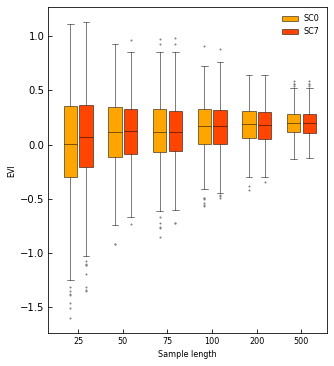

In [10]:
# Plot Figure 3
N_unique = list(set(param['Sample_length'].to_list()))
N_unique.sort()

leg_name = ['SC0','SC7']

dx=np.array([0, 2, 4, 6, 8, 10])
eps=2

fig = plt.figure(figsize = (5,6), constrained_layout = False)
t_ax = fig.add_subplot()
t_ax.set_xlabel('Sample length',fontdict=font)
t_ax.set_ylabel('EVI',fontdict=font)
t_ax.tick_params(axis = 'x', direction = "in",length = 4)
t_ax.tick_params(axis = 'y', direction = "in",length = 4)
aa=1    
for ind, nn in enumerate(N_unique):
    tmp=param[(param['Sample_length']==nn)]
    EVI_0=np.array(tmp['SC0_EVI'].to_list())
    EVI_7=np.array(tmp['SC7_EVI'].to_list())
    bp1=t_ax.boxplot(EVI_0, positions = [aa],widths = 0.6,patch_artist=True,boxprops=dict(linewidth = l_w,facecolor='orange'),whiskerprops=whiskerprops,flierprops=flierprops,medianprops=medianprops,capprops=capprops)  
    bp2=t_ax.boxplot(EVI_7, positions = [aa+0.7],widths = 0.6,patch_artist=True,boxprops=dict(linewidth = l_w,facecolor='orangered'),whiskerprops=whiskerprops,flierprops=flierprops,medianprops=medianprops,capprops=capprops)  
    t_ax.set_xlim(0,12.5)
    t_ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
    t_ax.set_xticklabels(L_unique, fontdict=font)  
    aa=aa+eps
t_ax.legend([bp1["boxes"][0], bp2["boxes"][0]], [leg_name[0], leg_name[1]], ncol = 1, frameon=False, prop=font_l)

fig.savefig("Figure3_%s.pdf" %distribution_name,bbox_inches="tight")    

# Figure 4
Box plots of the optimized weight, $\omega$, of the mixture kernel in KDE method.

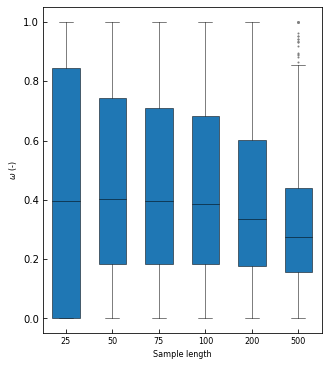

In [11]:
# Plot Figure 4
boxprops=dict(linewidth=l_w,facecolor='tab:blue')

fig = plt.figure(figsize = (5,6), constrained_layout = False)
t_ax = fig.add_subplot()
w_T=[]   
t_ax.set_xticklabels(["25","50","75","100","200","500"],fontdict=font)
t_ax.set_ylabel('$\omega$ (-)',fontdict=font)
t_ax.tick_params(axis = 'x', direction = "in",length = 4)
t_ax.tick_params(axis = 'y', direction = "in",length = 4)
for ind, nn in enumerate(N_unique):
    tmp=param[param['Sample_length']==nn]
    w_T.append(tmp['HTS_w'].to_list())
t_ax.boxplot(w_T, widths = 0.6,patch_artist=True,boxprops=boxprops,whiskerprops=whiskerprops,flierprops=flierprops,medianprops=medianprops,capprops=capprops)  
t_ax.tick_params(axis = 'y',direction="in",length=4)
t_ax.set_xlabel('Sample length',fontdict=font)
fig.savefig("Figure4_%s.pdf" %distribution_name,bbox_inches='tight')        